# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
X = data.iloc[:,:-1]
illness = data[["Dataset"]]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    illness,
    test_size = 0.2,
    random_state = 48
)

In [5]:
X_train_Direct_Bilirubin = np.array(X_train[["Direct_Bilirubin"]]).reshape(-1, 1)
X_test_Direct_Bilirubin = np.array(X_test[["Direct_Bilirubin"]]).reshape(-1, 1)

y_train= np.array(X_train[["Total_Bilirubin"]]).reshape(-1, 1)
y_test= np.array(X_test[["Total_Bilirubin"]]).reshape(-1, 1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X_train_Direct_Bilirubin, y_train)
model.score(X_test_Direct_Bilirubin, y_test)

0.9836760145743925

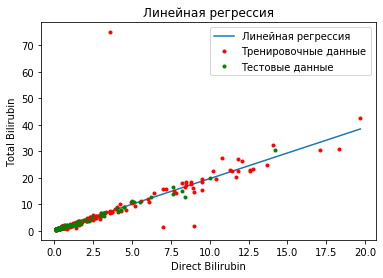

In [8]:
plt.xlabel("Direct Bilirubin")
plt.ylabel("Total Bilirubin")
plt.title("Линейная регрессия")
x = np.linspace(min(X_train_Direct_Bilirubin), max(X_train_Direct_Bilirubin), 100)
y = (model.coef_ * x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_Direct_Bilirubin, y_train, "r.")
plt.plot(X_test_Direct_Bilirubin, y_test, "g.")
plt.legend(["Линейная регрессия","Тренировочные данные","Тестовые данные"])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly =poly_reg.fit_transform(X_train_Direct_Bilirubin)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
pol_reg.score(poly_reg.fit_transform(X_test_Direct_Bilirubin), y_test)

0.9809422919531859

Улучшить результат не удалось.

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [10]:
data2 = data.dropna()
X = data2.drop("Dataset", axis = 1)
X["Gender"] = data2["Gender"].apply(lambda x: int(x == "Male"))
y = data2.Dataset

In [11]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [12]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.76      0.98      0.86        85
           2       0.71      0.16      0.26        31

    accuracy                           0.76       116
   macro avg       0.74      0.57      0.56       116
weighted avg       0.75      0.76      0.70       116



In [13]:
dataset_corr = data2.corr().abs().Dataset.sort_values(ascending=False)
dataset_corr

Dataset                       1.000000
Direct_Bilirubin              0.246273
Total_Bilirubin               0.220218
Alkaline_Phosphotase          0.183363
Albumin_and_Globulin_Ratio    0.163131
Alamine_Aminotransferase      0.163117
Albumin                       0.159770
Aspartate_Aminotransferase    0.151834
Age                           0.133164
Total_Protiens                0.033614
Name: Dataset, dtype: float64

In [14]:
max_corr = list(dataset_corr[1:5].keys())
X_train, X_test, y_train, y_test = train_test_split(data2[max_corr], y, test_size=0.2, random_state=14)
model2 = LogisticRegression(solver="liblinear").fit(X_train, y_train)
model_pred2 = model2.predict(X_test)
print(classification_report(y_test, model_pred2))

              precision    recall  f1-score   support

           1       0.74      0.93      0.82        86
           2       0.25      0.07      0.11        30

    accuracy                           0.71       116
   macro avg       0.50      0.50      0.47       116
weighted avg       0.61      0.71      0.64       116



Посчитать квартили для всех колонок. 

In [15]:
data2.quantile([0.10, 0.25, 0.50, 0.75, 0.90]).T

,0.1,0.25,0.5,0.75,0.9
Age,23.000,33.0,45.00,58.0,66.000
Total_Bilirubin,0.700,0.8,1.00,2.6,7.920
Direct_Bilirubin,0.100,0.2,0.30,1.3,4.100
Alkaline_Phosphotase,150.000,175.5,208.00,298.0,512.600
Alamine_Aminotransferase,18.000,23.0,35.00,61.0,140.200
Aspartate_Aminotransferase,19.000,25.0,42.00,87.0,192.000
Total_Protiens,5.100,5.8,6.60,7.2,7.900
Albumin,2.000,2.6,3.10,3.8,4.100
Albumin_and_Globulin_Ratio,0.546,0.7,0.93,1.1,1.308
Dataset,1.000,1.0,1.00,2.0,2.000


In [16]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,579.0,44.782383,16.221786,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,579.0,3.315371,6.227716,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,579.0,1.494128,2.816499,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,579.0,291.366149,243.561863,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,579.0,81.126079,183.182845,10.0,23.0,35.00,61.0,2000.0
Aspartate_Aminotransferase,579.0,110.414508,289.850034,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,579.0,6.481693,1.084641,2.7,5.8,6.60,7.2,9.6
Albumin,579.0,3.138515,0.794435,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,579.0,1.284974,0.451792,1.0,1.0,1.00,2.0,2.0


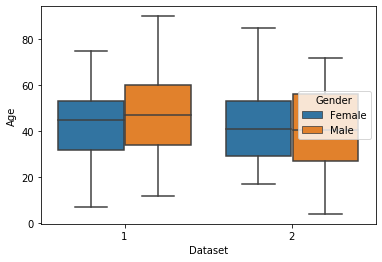

In [19]:
sns.boxplot(x=data2.Dataset, y=data2.Age, hue=data2.Gender)

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

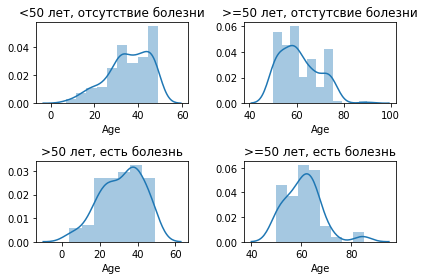

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.flatten()
plt_params = ([
    [data2[(data2.Age < 50) & (data2.Dataset == 1)],"<50 лет, отсутствие болезни"],
    [data2[(data2.Age >= 50) & (data2.Dataset == 1)],">=50 лет, отстутсвие болезни"],
    [data2[(data2.Age < 50) & (data2.Dataset == 2)],">50 лет, есть болезнь"],
    [data2[(data2.Age >= 50) & (data2.Dataset == 2)],">=50 лет, есть болезнь"]
])
for n, axis in enumerate(ax):
    sns.distplot(plt_params[n][0]["Age"], ax=axis)
    ax[n].set_title(plt_params[n][1])
plt.tight_layout()
plt.show()

In [22]:
for group in plt_params:
    print(group[1])
    print(group[0].describe().loc[["mean","50%"], :].T)
    print()

<50 лет, отсутствие болезни
                                  mean     50%
Age                          35.316667   37.00
Total_Bilirubin               4.196250    1.25
Direct_Bilirubin              2.017917    0.45
Alkaline_Phosphotase        291.800000  221.50
Alamine_Aminotransferase    122.533333   45.00
Aspartate_Aminotransferase  149.945833   58.00
Total_Protiens                6.588750    6.75
Albumin                       3.217500    3.20
Albumin_and_Globulin_Ratio    0.978250    1.00
Dataset                       1.000000    1.00

>=50 лет, отстутсвие болезни
                                  mean    50%
Age                          61.080460   60.0
Total_Bilirubin               4.158621    1.7
Direct_Bilirubin              1.812644    0.6
Alkaline_Phosphotase        357.793103  238.0
Alamine_Aminotransferase     68.856322   37.5
Aspartate_Aminotransferase  121.936782   46.5
Total_Protiens                6.279310    6.4
Albumin                       2.839080    2.9
Albumin_and


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [23]:
all_Total_Bilirubin = data2.Total_Bilirubin
sick_Total_Bilirubin = data2[data2.Dataset == 1].Total_Bilirubin
stats.ttest_1samp(sick_Total_Bilirubin, all_Total_Bilirubin.mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

Выборки не распределены одинаково.

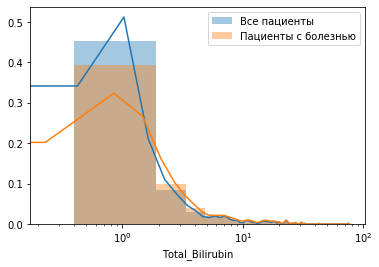

In [24]:
sns.distplot(a=all_Total_Bilirubin, label="Все испытуемые")
sns.distplot(a=sick_Total_Bilirubin, label="Больные")
plt.gca().set_xscale("log")
plt.legend(["Все пациенты", "Пациенты с болезнью"])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [27]:
healthy_Total_Bilirubin = data2[data2.Dataset == 2].Total_Bilirubin
sick_Total_Bilirubin = data2[data2.Dataset == 1].Total_Bilirubin
t_crit = stats.ttest_ind(healthy_Total_Bilirubin, sick_Total_Bilirubin)
print(f"p = {t_crit.pvalue:.4f}")
t_crit

p = 0.0000


Ttest_indResult(statistic=-5.422946004172417, pvalue=8.632557516910643e-08)

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [28]:
group1 = data2[data2.Age < 30].Dataset
group2 = data2[(data2.Age >= 30) & (data2.Age < 55)].Dataset
group3 = data2[data2.Age > 55].Dataset
anova_crit = stats.f_oneway(group1, group2, group3)
print(f"p={anova_crit.pvalue:.4f}")

p=0.0002


Неверно было бы считать, что выборки схожи.